## Import

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [28]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
pre_path = "../../../../../../../"
physical_model = "MIST"
path_to_data = pre_path + "data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = pre_path + "results/default_models/"
path_to_predictions = pre_path + "predictions/default_models/"
tag = "log_g_filtered_bigger_3_5"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


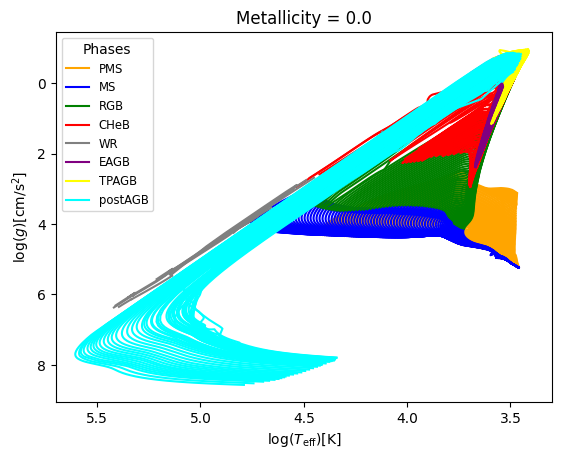

In [30]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [31]:
print_uniques("log_g", iso_df)
# print_uniques_count("log_g", iso_df)

log_g : 1467122 unique values, range [-1.14489780699774, 8.654432637941216]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


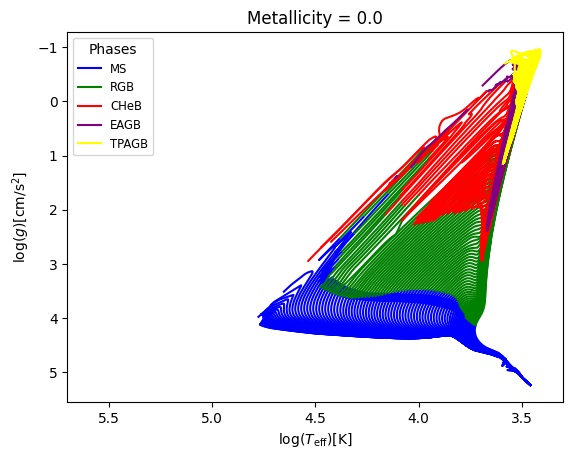

In [32]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [33]:
print_uniques("log_g", phase_filtered_iso_df)
# print_uniques_count("log_g", phase_filtered_iso_df)

log_g : 1140744 unique values, range [-1.14489780699774, 6.259434356871683]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
375170,10.3,3.658372,3.626284,2.0,0.50,0.914954,0.386591
375171,10.3,3.657953,3.599620,2.0,0.50,0.915260,0.399998
375172,10.3,3.657545,3.572885,2.0,0.50,0.915554,0.413438
375173,10.3,3.657128,3.546027,2.0,0.50,0.915838,0.426936


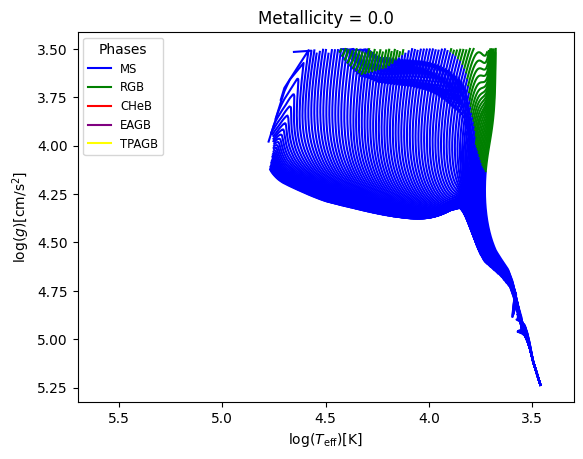

In [34]:
phase_log_g_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], "log_g" : (">", 3.5)})
display(phase_log_g_filtered_iso_df)
data_visualiser_phase_age_filtered = Data_visualiser(phase_log_g_filtered_iso_df, physical_model)
data_visualiser_phase_age_filtered.plot_Kiel([], [0.0])

In [35]:
print_all_uniques(phase_log_g_filtered_iso_df)

Range in log10_isochrone_age_yr column : 5.0 - 10.3
Mean value in log10_isochrone_age_yr column : 7.955848070900247
Median value in log10_isochrone_age_yr column : 8.0

Range in log_Teff column : 3.344668191350628 - 5.378801600728572
Mean value in log_Teff column : 4.122723475110242
Median value in log_Teff column : 4.133571884371824

Range in log_g column : 3.500001478800997 - 6.259434356871683
Mean value in log_g column : 4.351055848481251
Median value in log_g column : 4.391854452126879

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

Range in star_mass column : 0.0999979840073621 - 298.5447575808816
Mean value in star_mass column : 9.691422142248134
Median value in star_mass column : 2.643979600983972

Range in log_R column : -0.9974747647513328 - 1.6971683675695644
Mean value in log_R column : 0.2781226021875595
Median value in log_R column : 0.28189786531

In [36]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_log_g_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.0999979840073621 - 296.5221171165397
Median value in train data for the mass parameter: 2.6502164961102554
Mean value in train data for the mass parameter: 9.72458810282006
Range in train data for the radius parameter : -0.9974747647513328 - 1.6971683675695644
Median value in train data for the radius parameter: 0.2830133782909047
Mean value in train data for the radius parameter: 0.2788147860628917

Testing set statistics:
Range in test data for the mass parameter : 0.0999981499803954 - 298.5447575808816
Median value in test data for the mass parameter: 2.6260497810711407
Mean value in test data for the mass parameter: 9.591924614136646
Range in test data for the radius parameter : -0.9973627769638856 - 1.6644519135084452
Median value in test data for the radius parameter: 0.2786252271290398
Mean value in test data for the radius parameter: 0.2760460579413942

(281381, 4) (93794, 4)
(281381, 2) (93794, 2)


## Model training

### Linear regression

In [37]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.3022988533209865
RMSE :  19.104766583863146
MAE :  9.693516337690694
MedAE :  7.6498373862238545
CORR :  0.549817109719077
MAX_ER :  266.6839396577651
Percentiles : 
  75th percentile :  10.80949724487724
  90th percentile :  13.697552564548408
  95th percentile :  14.657411788783332
  99th percentile :  89.66819727248982



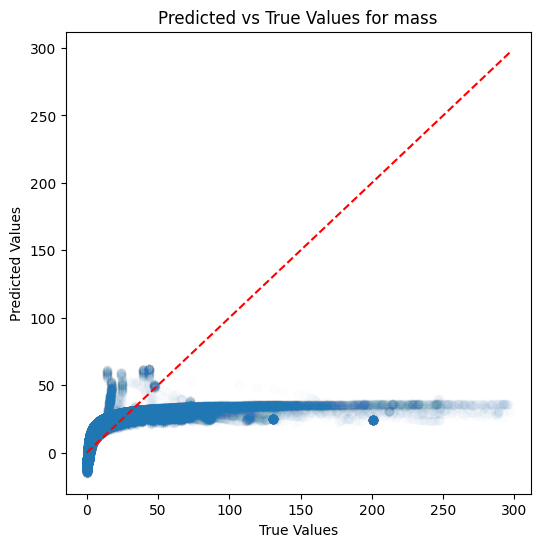

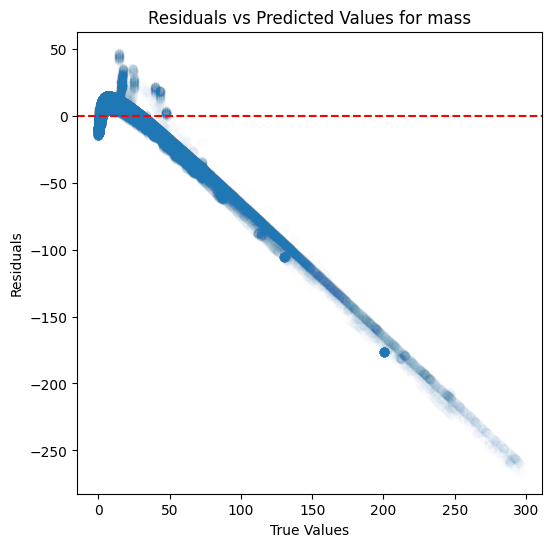

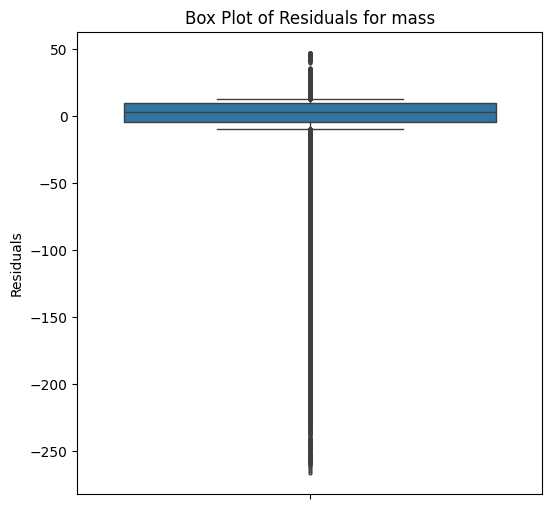

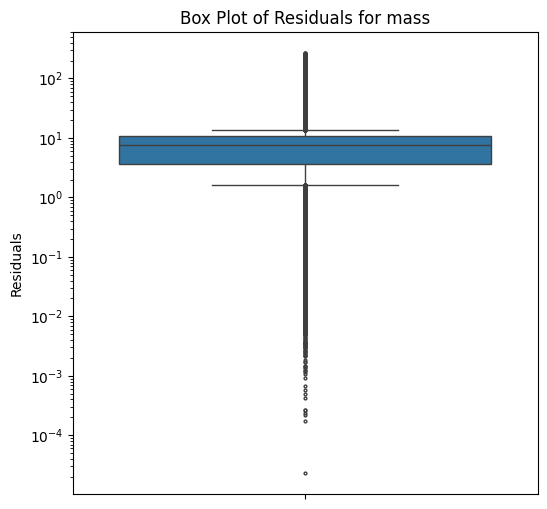

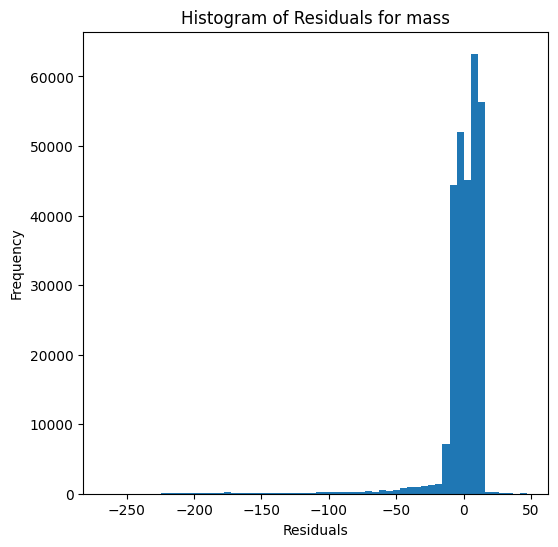

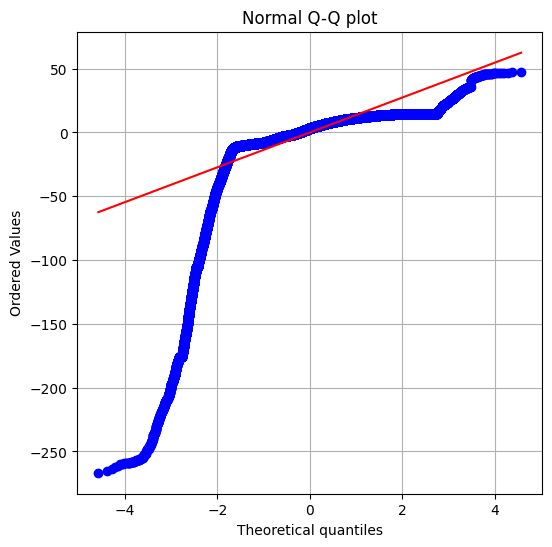


radius results:
RVE :  0.9799410956227308
RMSE :  0.06642646407449426
MAE :  0.04847936580803161
MedAE :  0.04097100582509933
CORR :  0.9899197420113868
MAX_ER :  0.46861550242190386
Percentiles : 
  75th percentile :  0.058659636755878763
  90th percentile :  0.08245350550947833
  95th percentile :  0.11226694040627805
  99th percentile :  0.26361622939954116



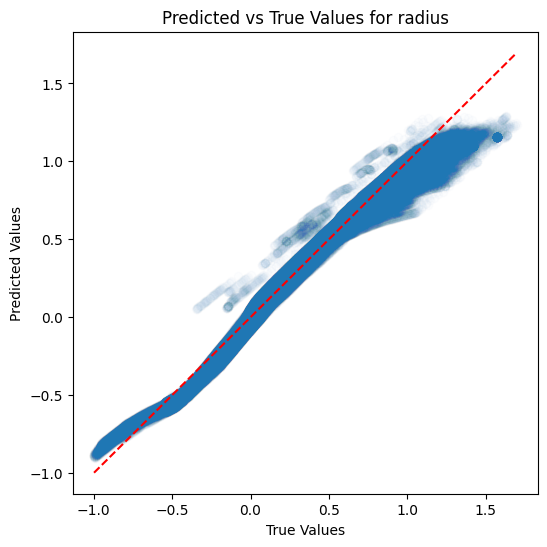

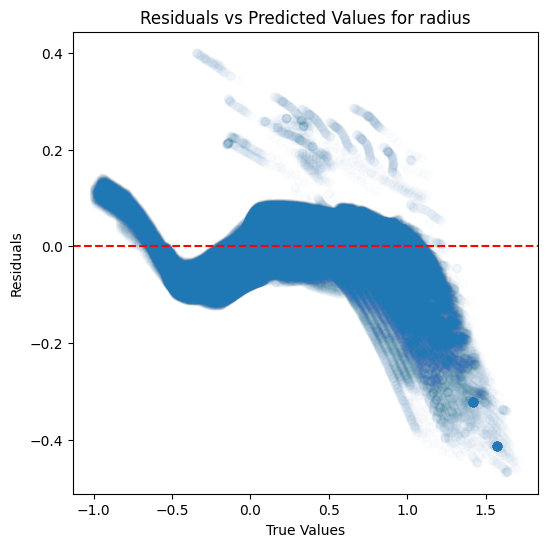

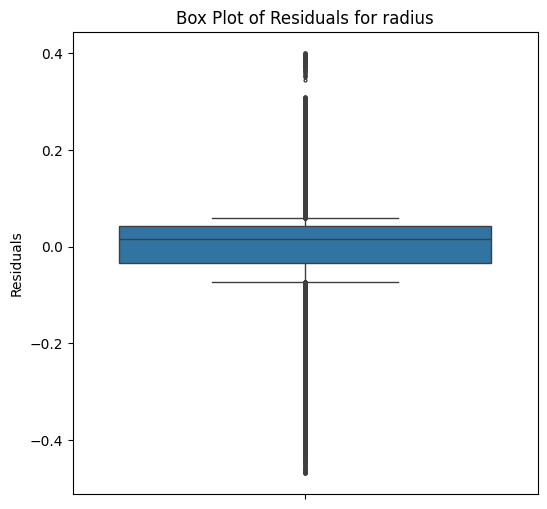

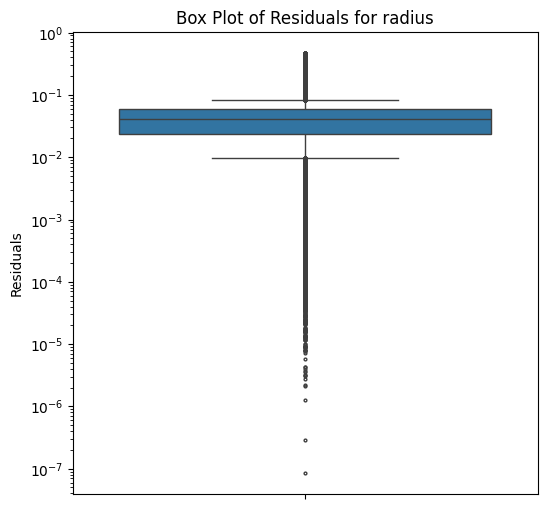

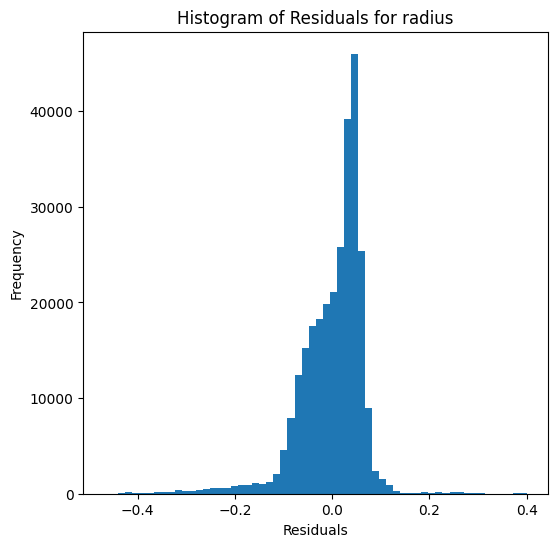

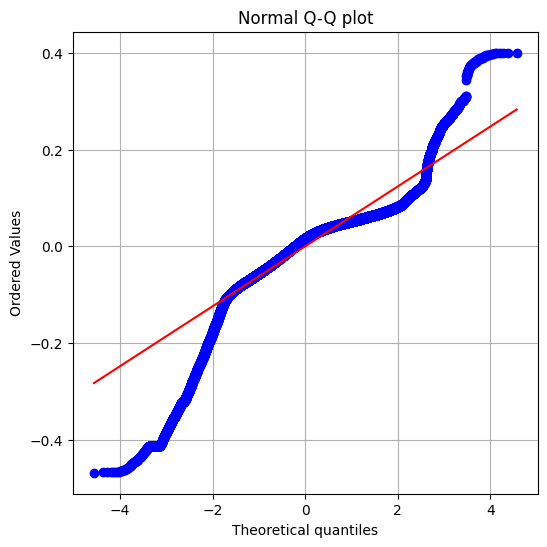

In [38]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [39]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9922359015469233
RMSE :  2.015362381670535
MAE :  0.2284638682400546
MedAE :  0.004622099041377226
CORR :  0.9961128797529779
MAX_ER :  162.66929816825464
Percentiles : 
  75th percentile :  0.022286844956145302
  90th percentile :  0.12404042841865603
  95th percentile :  0.44955514831880805
  99th percentile :  5.01607566317586



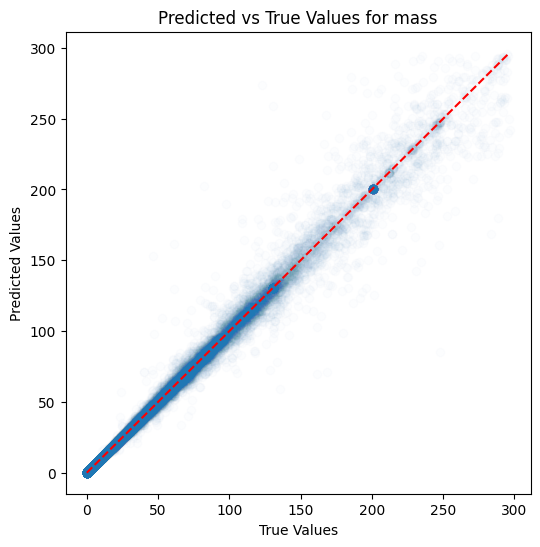

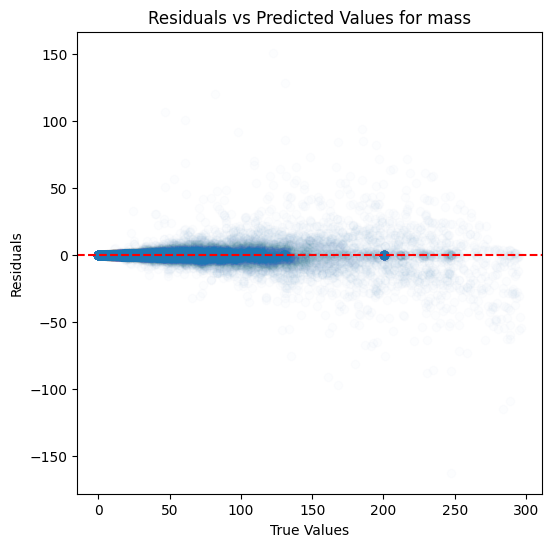

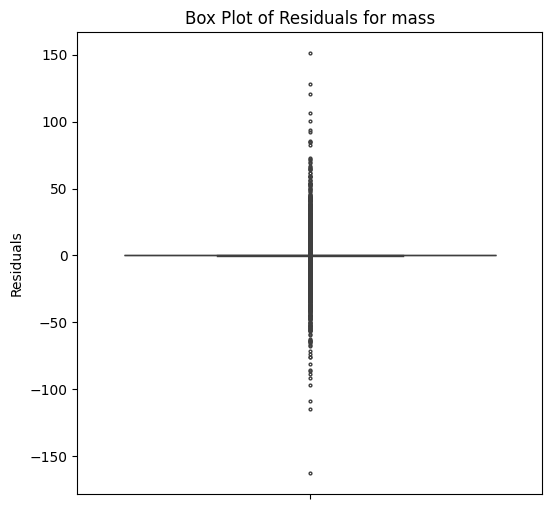

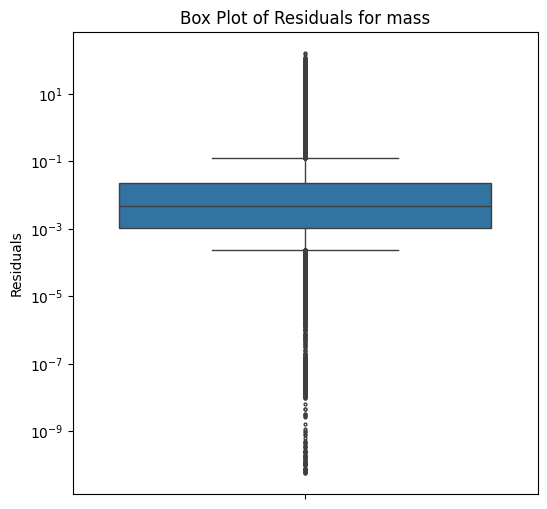

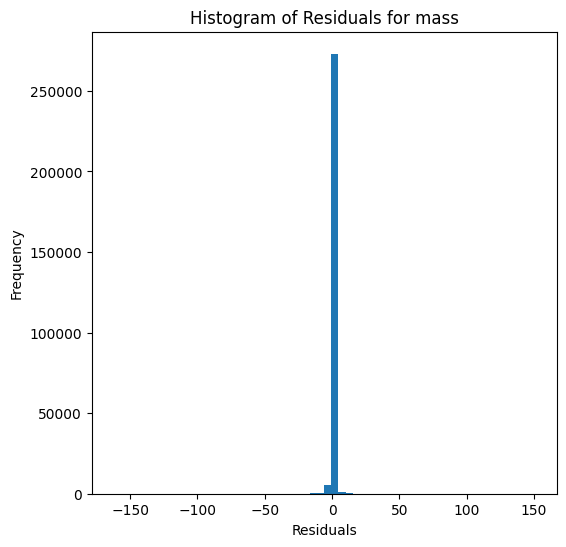

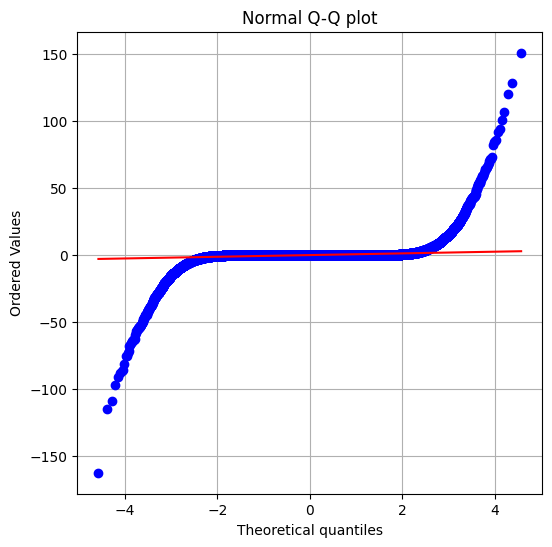


radius results:
RVE :  0.9996932354309226
RMSE :  0.008222516344172011
MAE :  0.004638250628814282
MedAE :  0.0027038381619611807
CORR :  0.999846619245267
MAX_ER :  0.3308416504297713
Percentiles : 
  75th percentile :  0.005418705192307638
  90th percentile :  0.010359615850521697
  95th percentile :  0.015235106419922984
  99th percentile :  0.032301496891987434



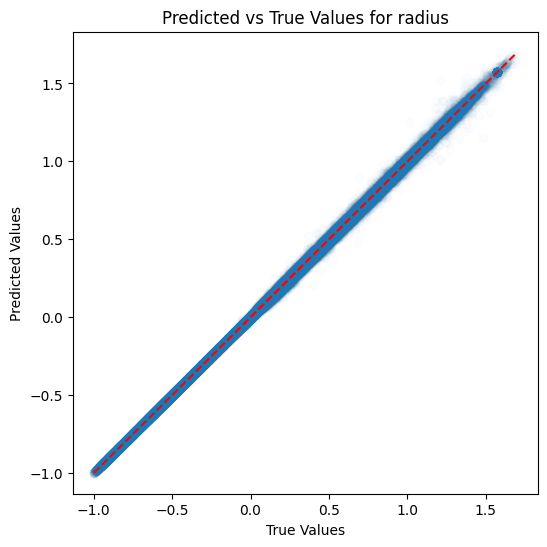

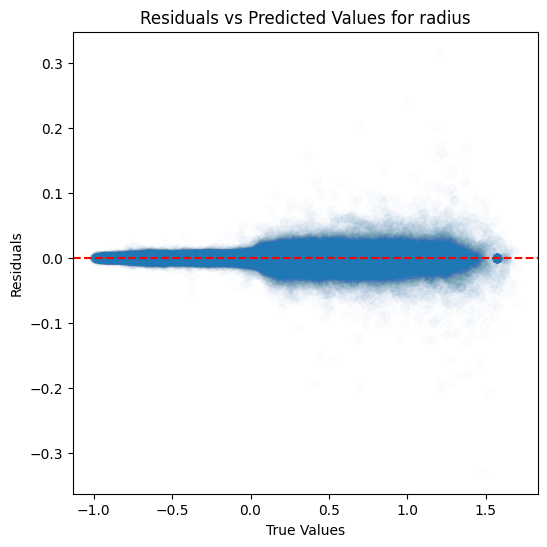

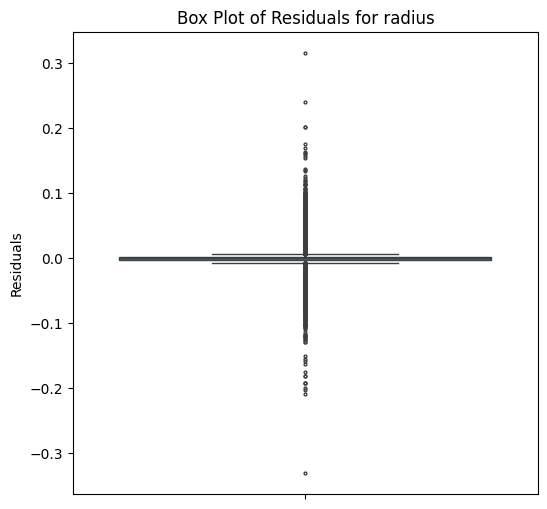

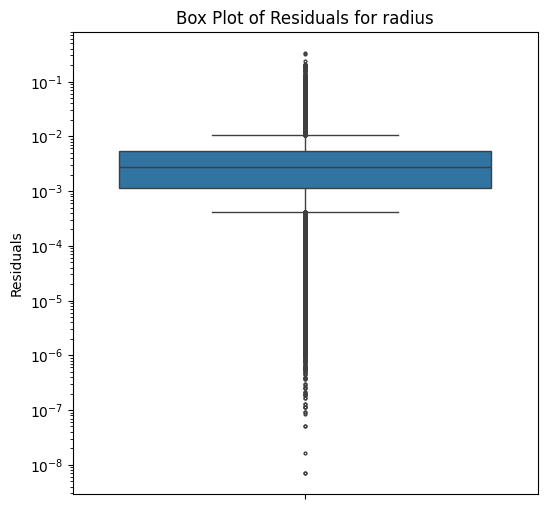

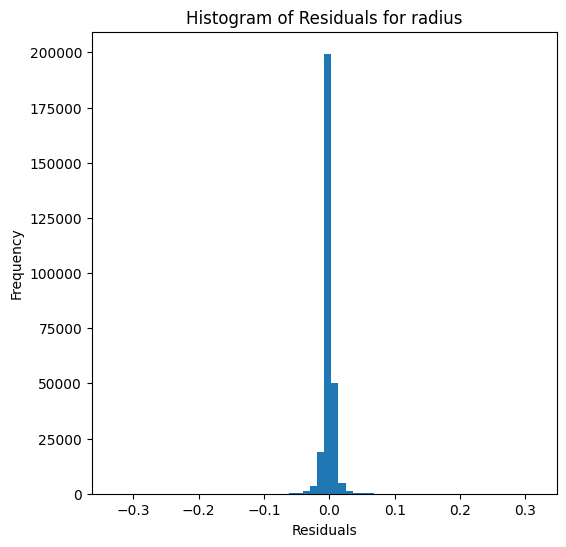

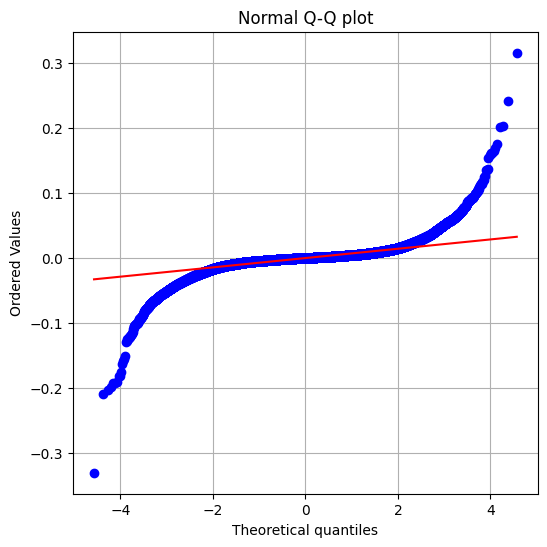

In [40]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [41]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9831652426689707
RMSE :  2.9691699489982275
MAE :  0.33867056038274496
MedAE :  0.008508189329838323
CORR :  0.992165586125404
MAX_ER :  132.69125224807703
Percentiles : 
  75th percentile :  0.03851027945723562
  90th percentile :  0.20833939192563555
  95th percentile :  0.7002690388008865
  99th percentile :  6.648386829232886



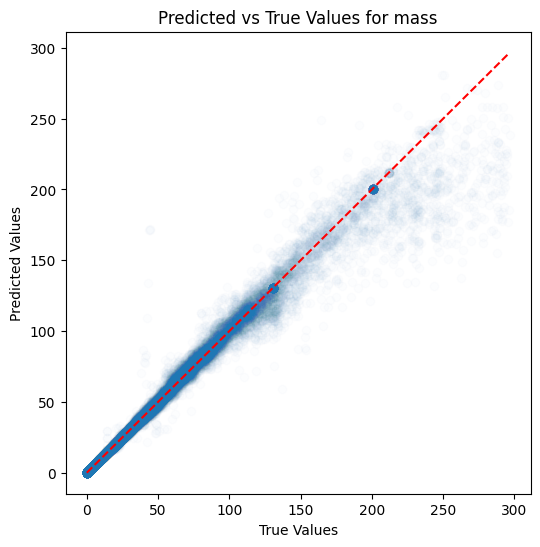

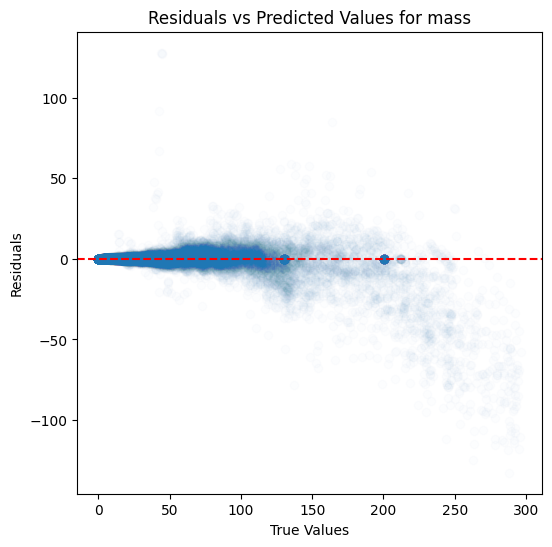

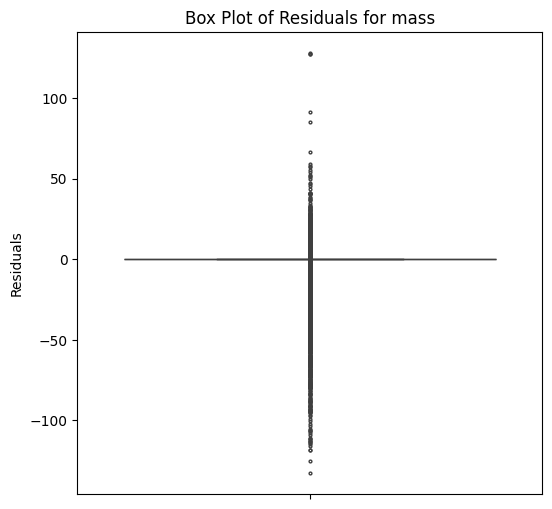

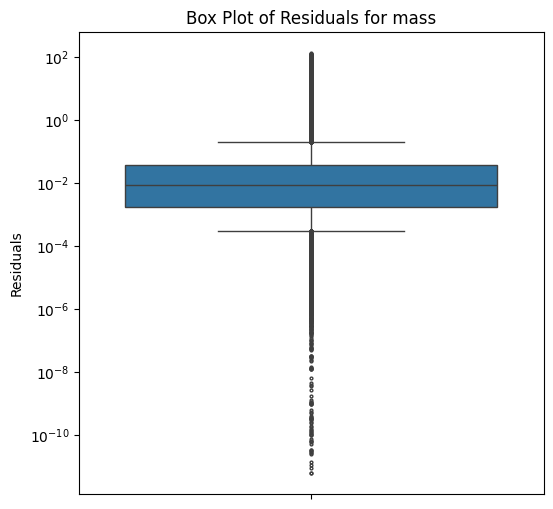

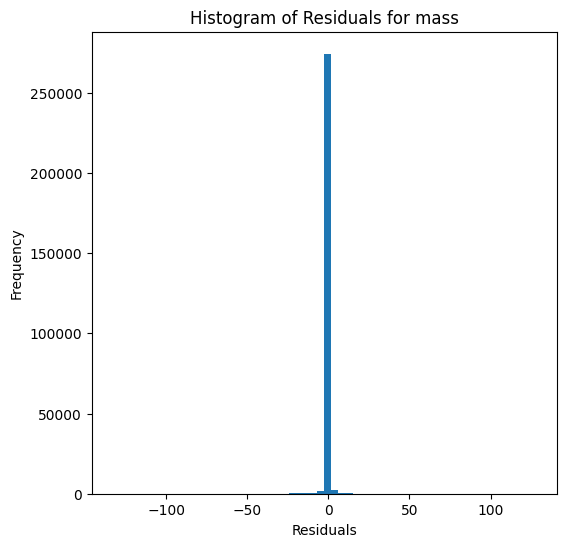

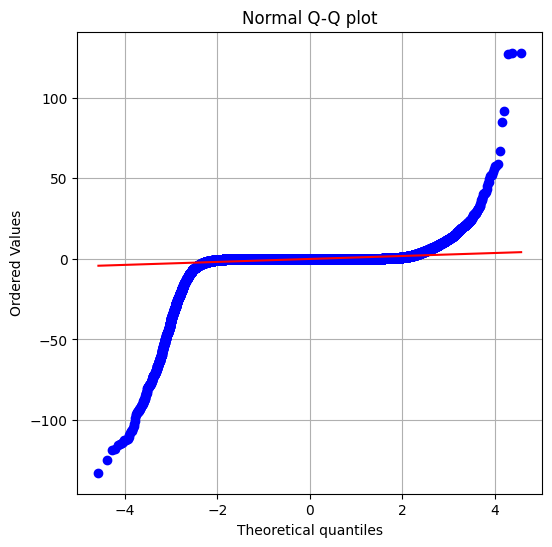


radius results:
RVE :  0.9997652821560189
RMSE :  0.007188962697818339
MAE :  0.0040729328643003375
MedAE :  0.00246876424900333
CORR :  0.999883917225499
MAX_ER :  0.2856170340572046
Percentiles : 
  75th percentile :  0.004955090399259843
  90th percentile :  0.009138471677572257
  95th percentile :  0.01286789522000148
  99th percentile :  0.02482911747104348



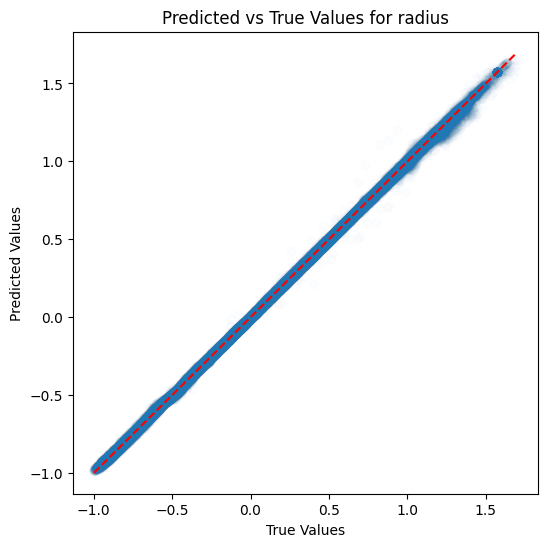

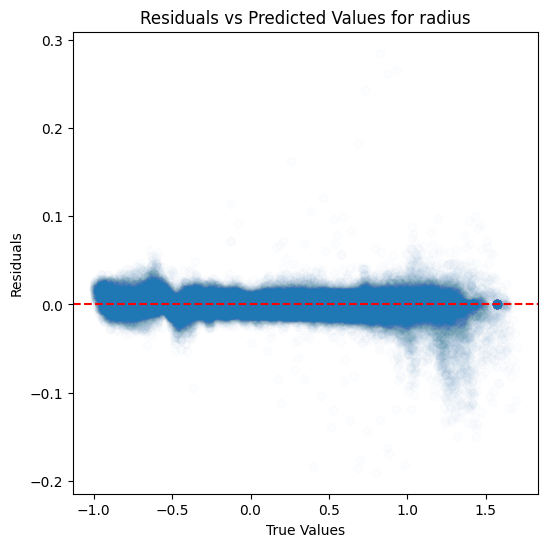

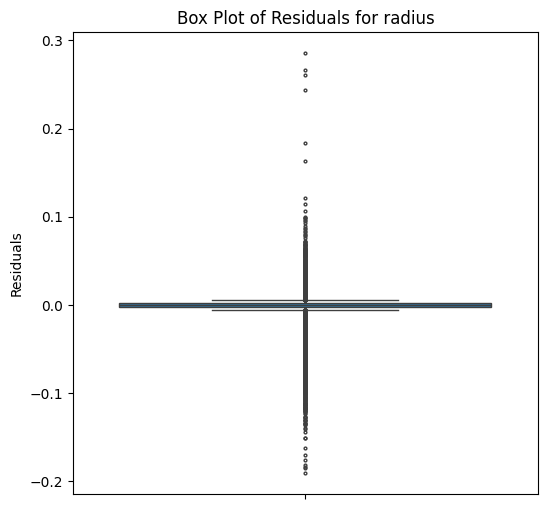

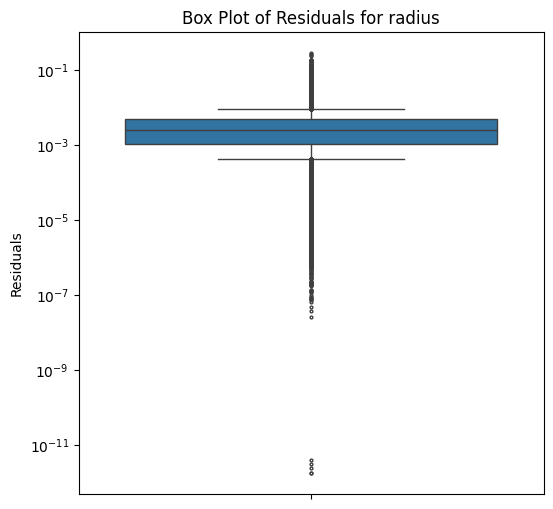

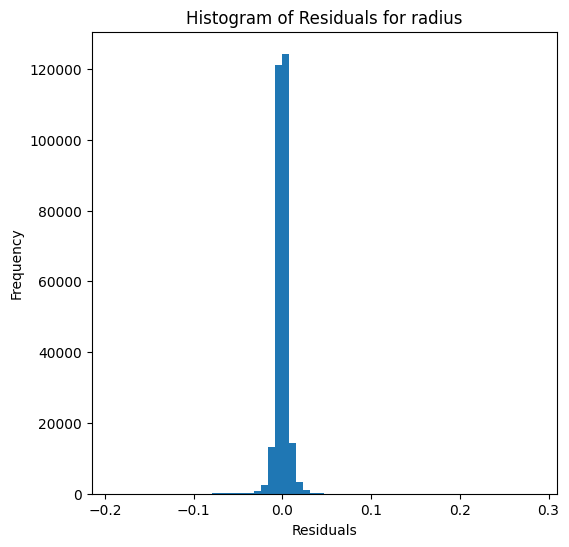

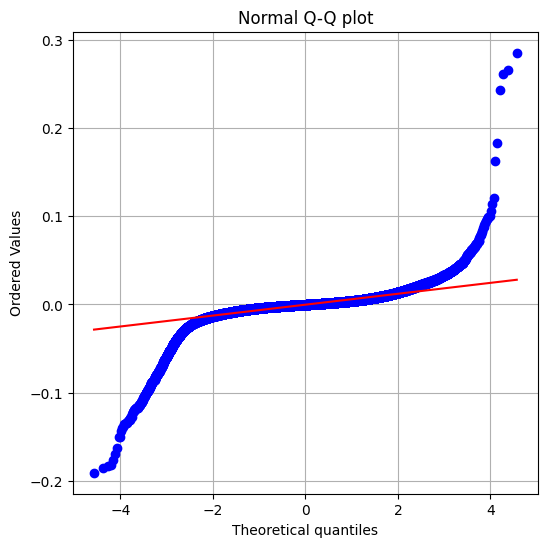

In [42]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [43]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.997464456102146
RMSE :  1.1517102247974784
MAE :  0.1242491841908666
MedAE :  0.0030642998611511985
CORR :  0.9987454774903126
MAX_ER :  83.9112877596776
Percentiles : 
  75th percentile :  0.01153609540836742
  90th percentile :  0.05959991158636413
  95th percentile :  0.22818299521910745
  99th percentile :  2.5109617787069545



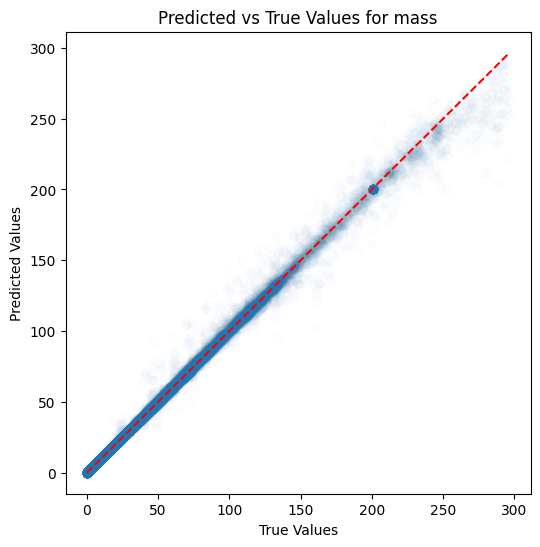

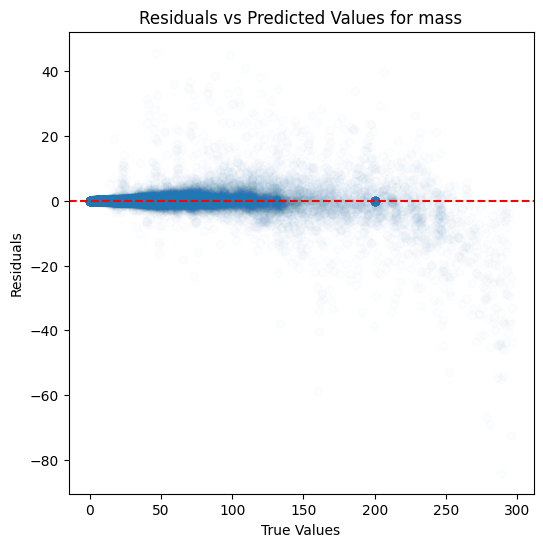

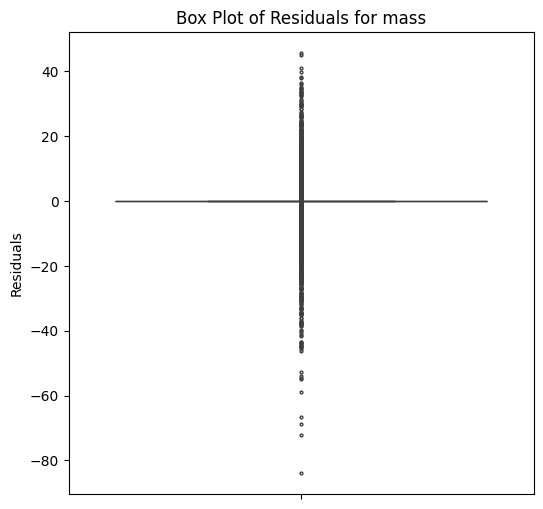

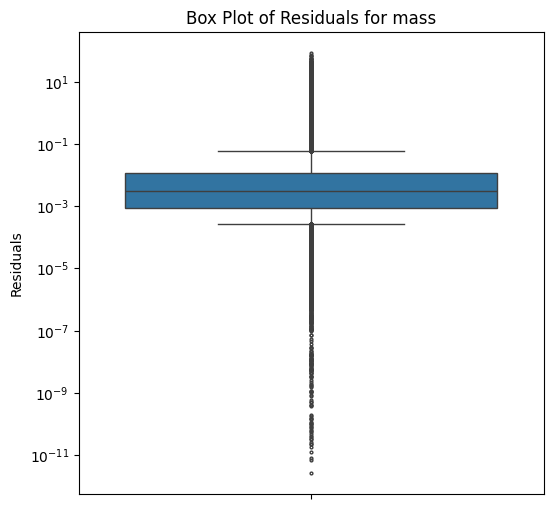

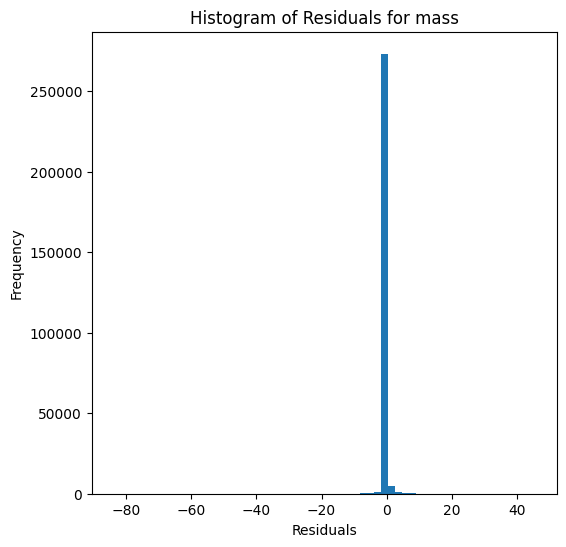

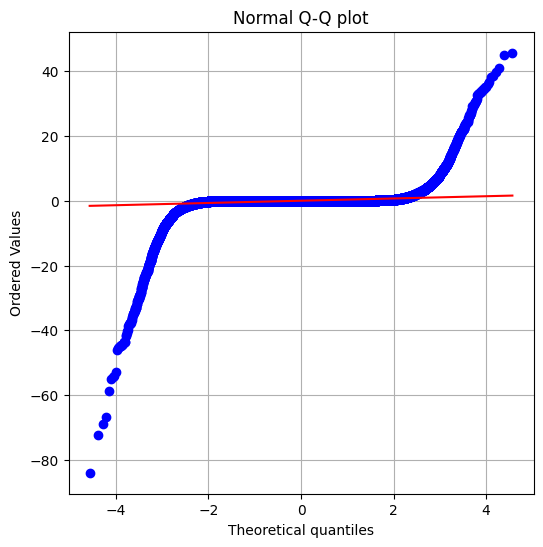


radius results:
RVE :  0.9999286269577644
RMSE :  0.003974220697100688
MAE :  0.002000793265288804
MedAE :  0.00101556273159914
CORR :  0.9999643988262411
MAX_ER :  0.20041408719250497
Percentiles : 
  75th percentile :  0.0023108365058427394
  90th percentile :  0.004667398806241674
  95th percentile :  0.007070695983457886
  99th percentile :  0.014559107521659334



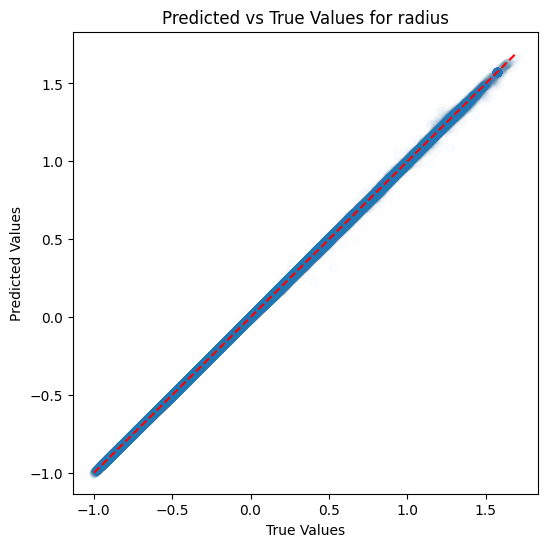

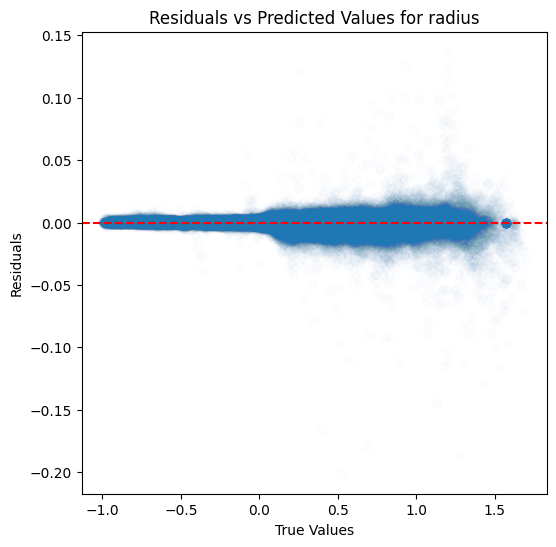

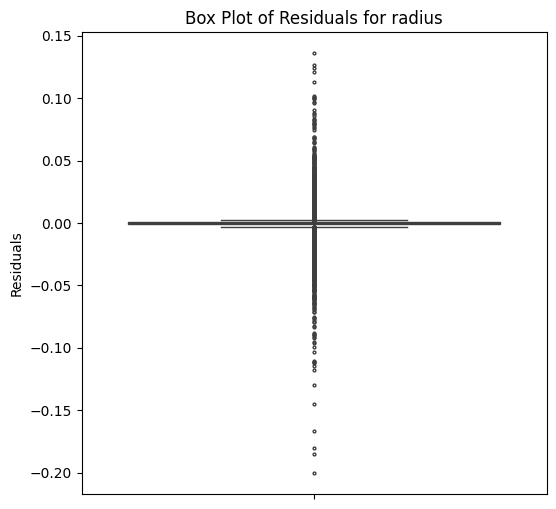

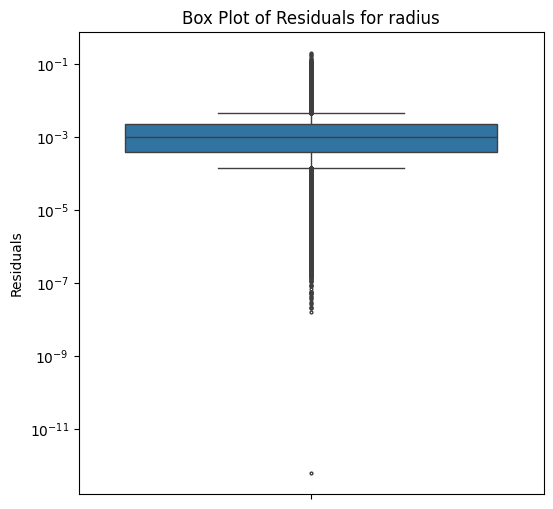

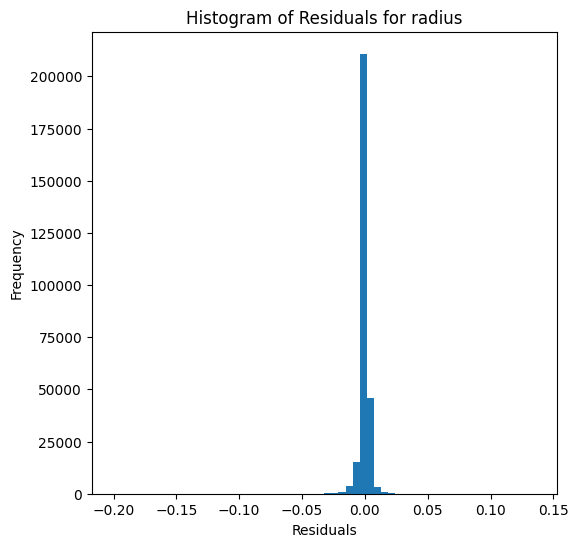

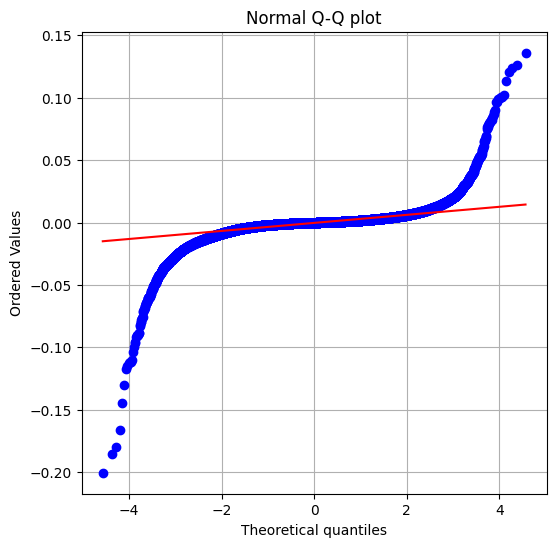

In [44]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [45]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9933752295088617
RMSE :  1.861628857847631
MAE :  0.44041541369421466
MedAE :  0.09065022672987855
CORR :  0.9966837599176745
MAX_ER :  72.22385394418885
Percentiles : 
  75th percentile :  0.2493009649635365
  90th percentile :  0.6809086930170523
  95th percentile :  1.4793597860124947
  99th percentile :  7.482816309624542



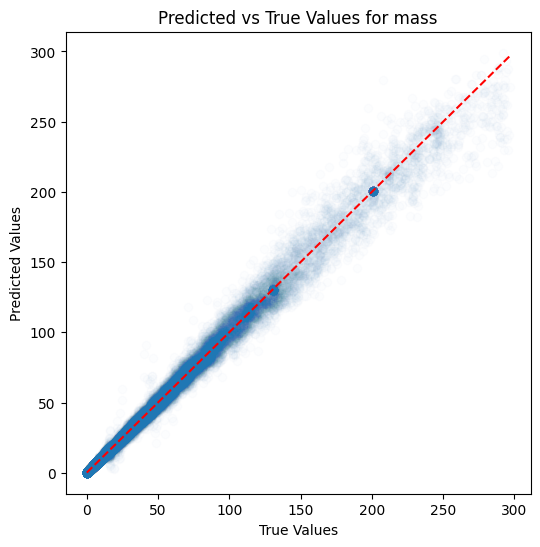

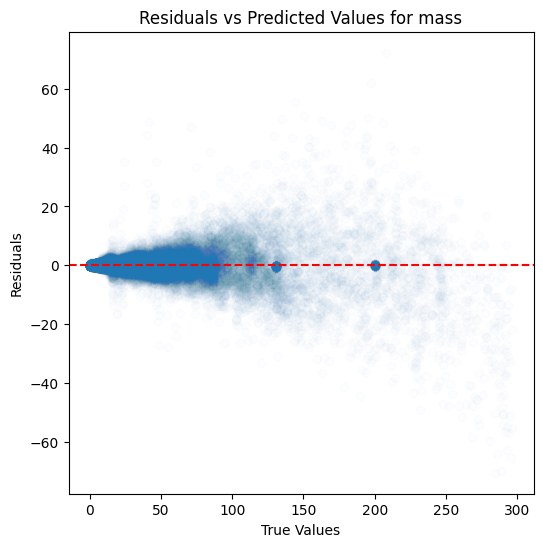

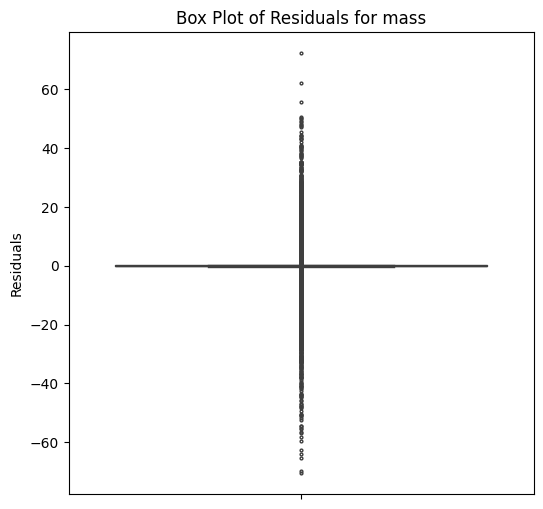

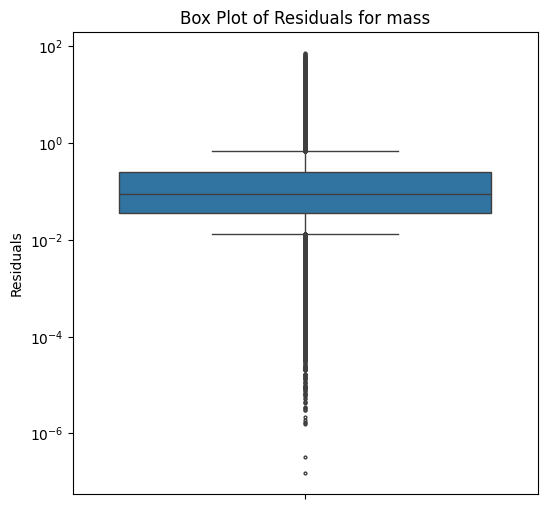

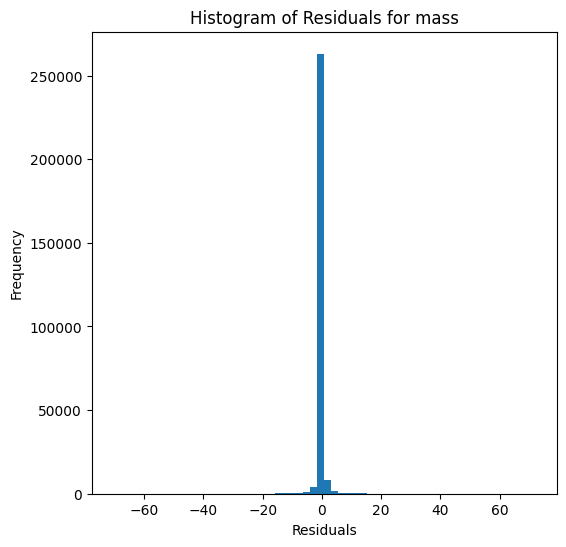

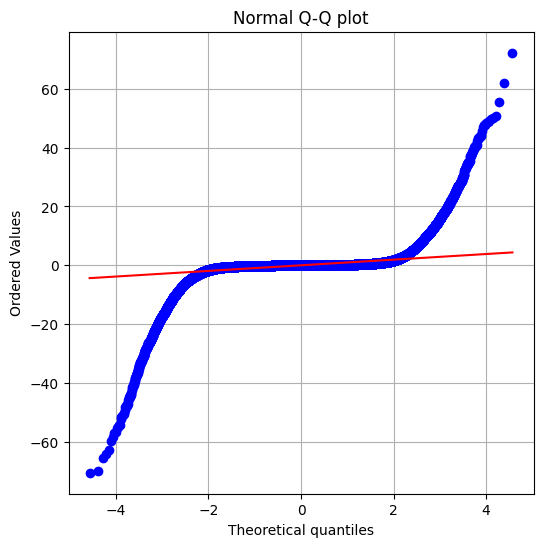


radius results:
RVE :  0.9995232705620849
RMSE :  0.010240591649254208
MAE :  0.007268548456747496
MedAE :  0.0054994357630125945
CORR :  0.9997616273000233
MAX_ER :  0.34567055394412427
Percentiles : 
  75th percentile :  0.009949785850273729
  90th percentile :  0.015524832105258901
  95th percentile :  0.01966755871089121
  99th percentile :  0.030473985830181412



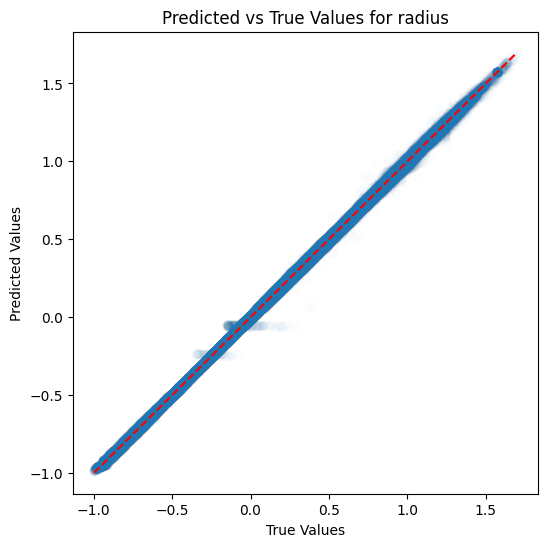

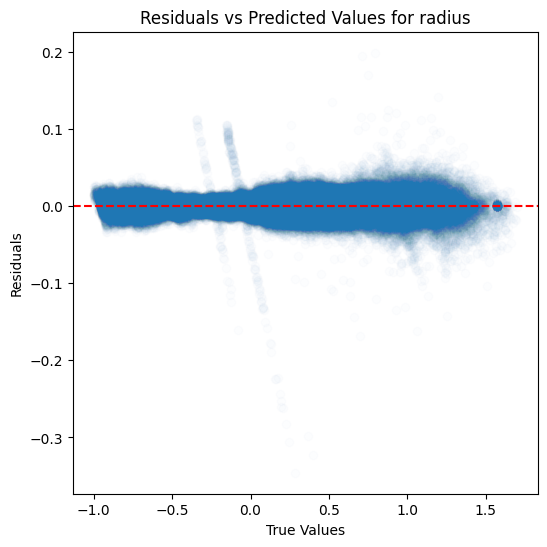

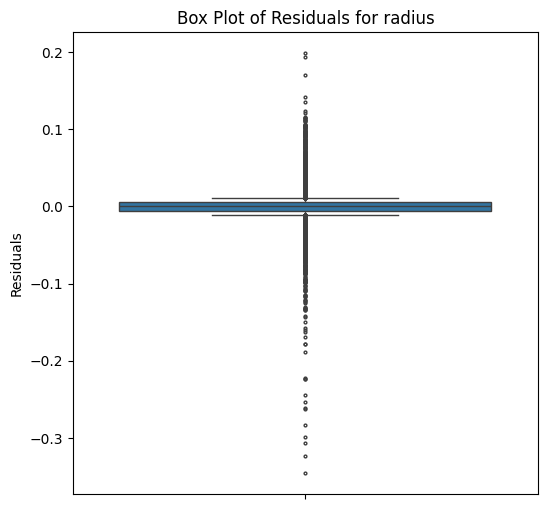

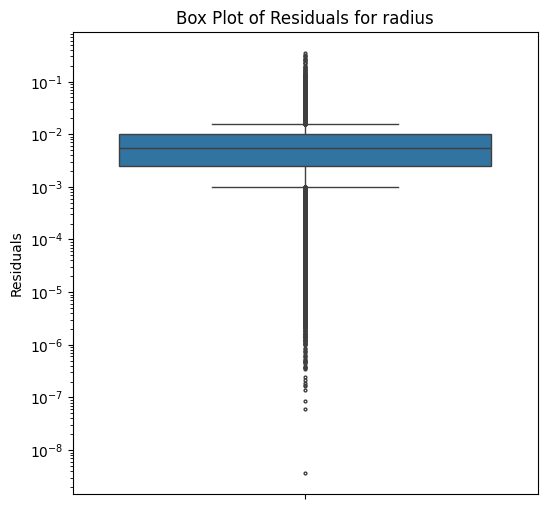

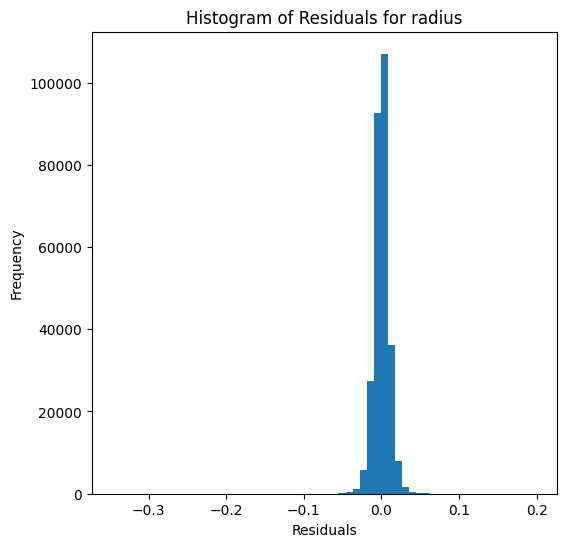

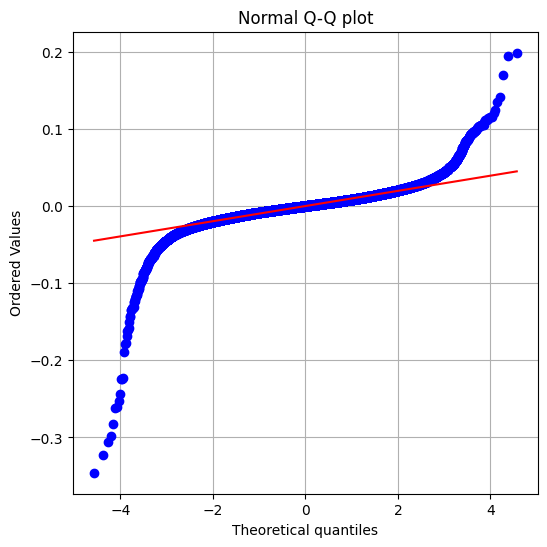

In [46]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [47]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


log_g_filtered_bigger_3_5 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.822796724188583
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.438567598551603
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.41120441760266
4 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


3.4530233842751334
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


2.9504759141564345

mass results:
RVE :  0.981854484656696
RMSE :  3.081937655324945
MAE :  0.9851091674830192
MedAE :  0.4106808697963409
CORR :  0.9908939361295679
MAX_ER :  165.07077237768416
Percentiles : 
  75th percentile :  0.7487096060126781
  90th percentile :  1.6594719905188295
  95th percentile :  3.397357510100189
  99th percentile :  12.38951497581606



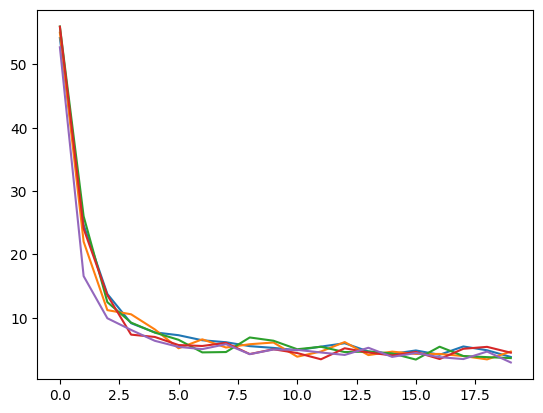

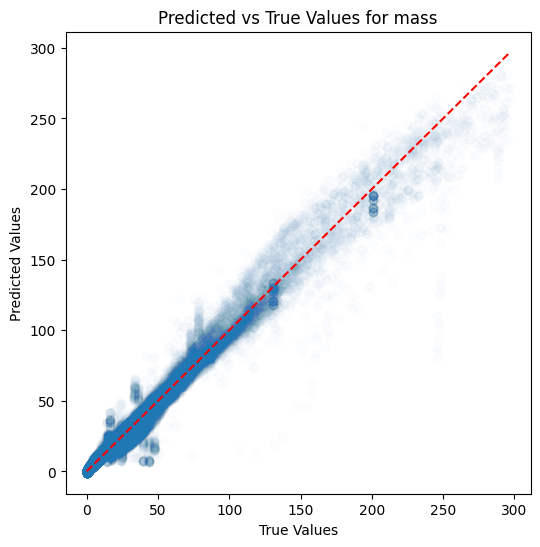

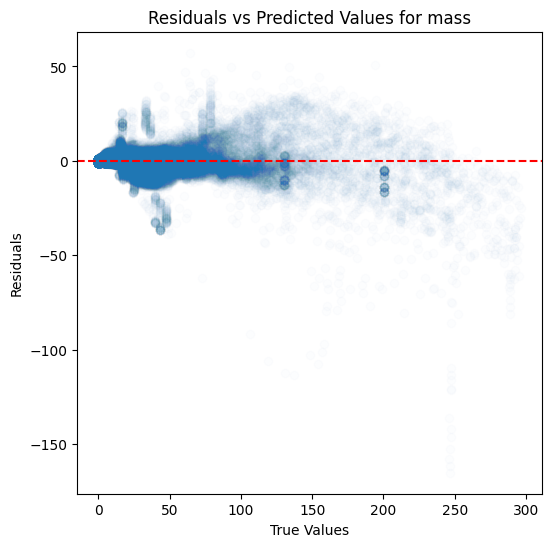

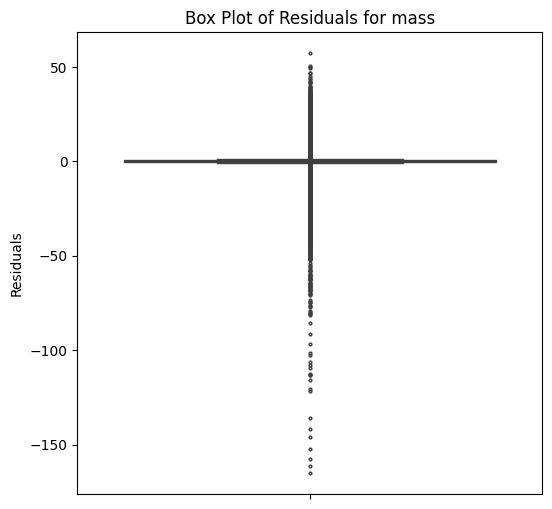

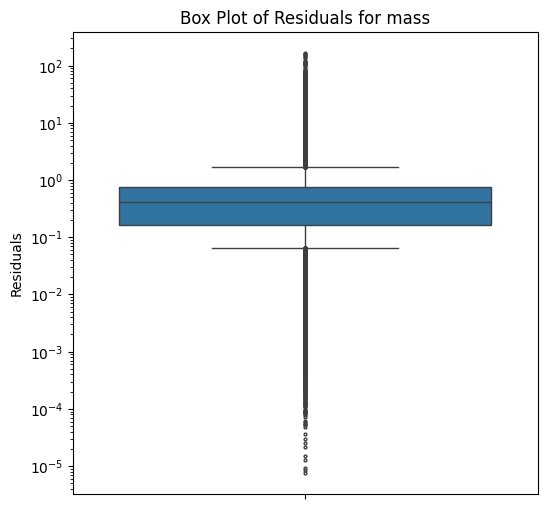

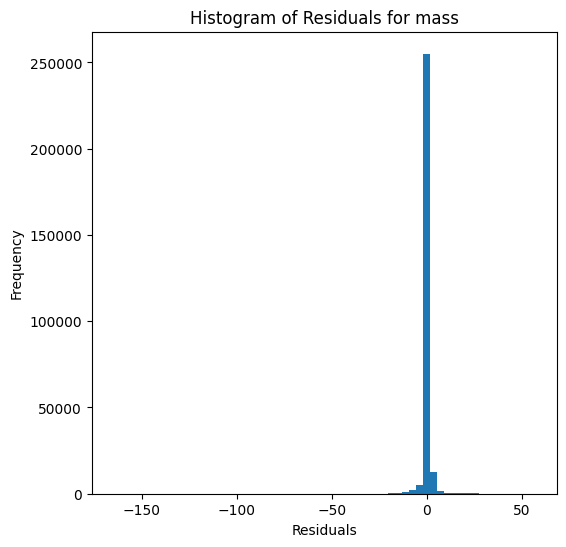

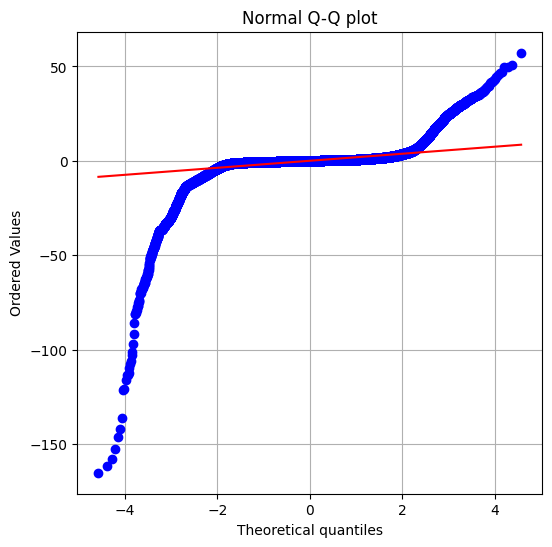


radius results:
RVE :  0.9410988948170234
RMSE :  0.11536269872074051
MAE :  0.08902872175862439
MedAE :  0.0724888746845549
CORR :  0.970102523534867
MAX_ER :  1.331960450435419
Percentiles : 
  75th percentile :  0.12874214581532858
  90th percentile :  0.18280986048080217
  95th percentile :  0.2181479494743333
  99th percentile :  0.3318135942778286



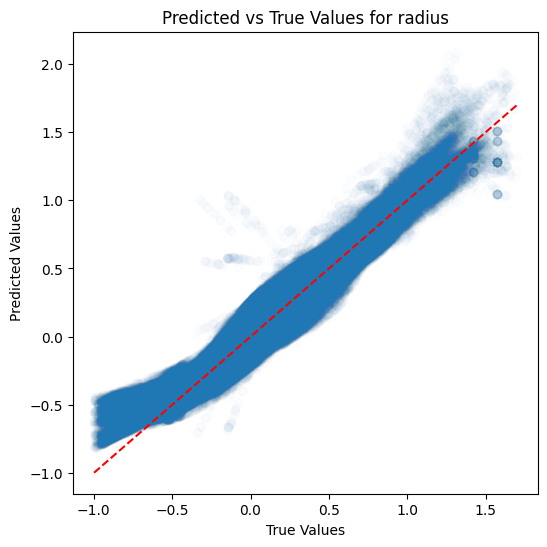

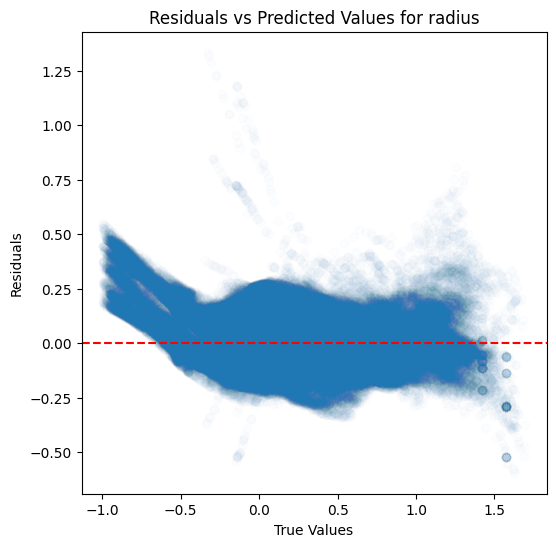

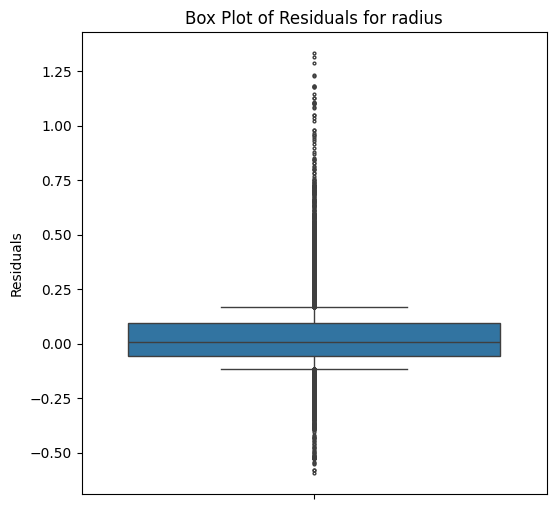

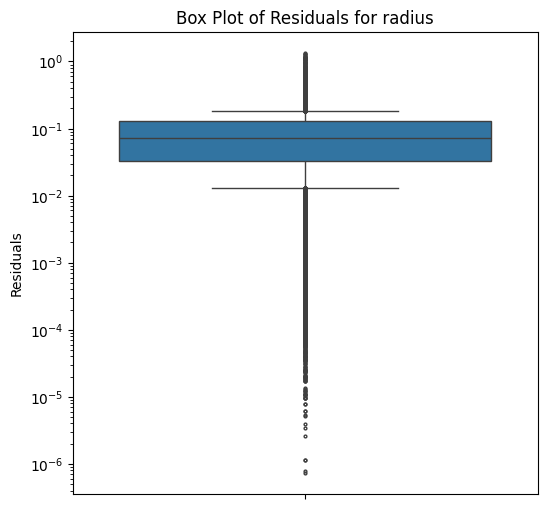

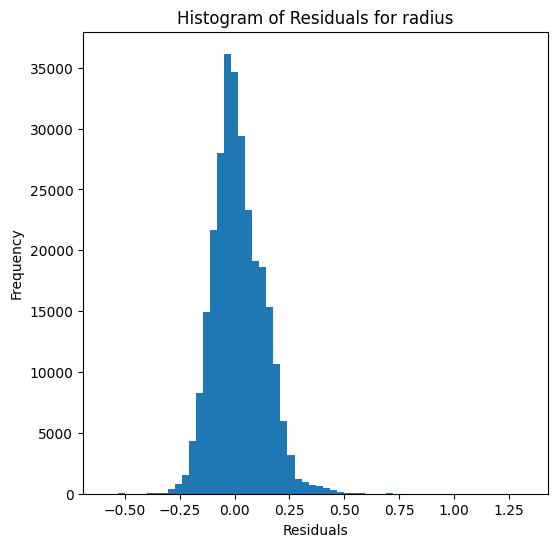

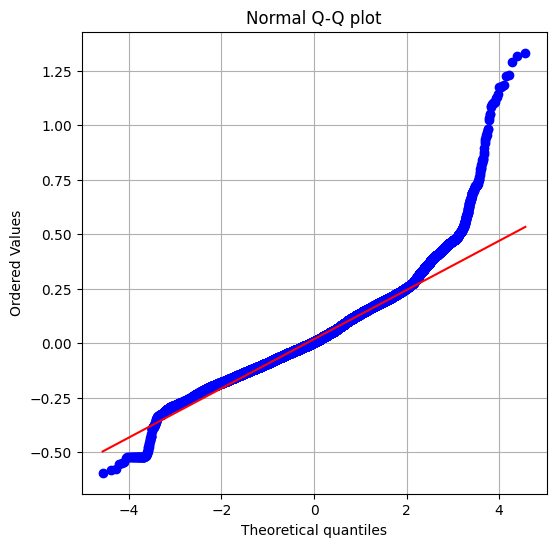

In [48]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)